# White Wine Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ready CSV 

In [2]:
df = pd.read_csv("./Resources/Data/winequality-white-clean.csv", delimiter=',')
#df = pd.read_csv("./Resources/Data/winequality-white-clean-correlation.csv", delimiter=',')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,Fair
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,Fair
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,Fair
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,Fair
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
3952,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Fair
3953,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Fair
3954,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Fair
3955,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Very Good


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
X.shape


(3957, 11)

In [4]:
y = df['quality']
y.shape

(3957,)

In [5]:
#from sklearn.ensemble import ExtraTreesClassifier
#white_dl_model = ExtraTreesClassifier()
#white_dl_model.fit(X, y)
#print(white_dl_model.feature_importances_)
#feat_importances = pd.Series(white_dl_model.feature_importances_, index=X_names)
#feat_importances.nlargest(10).plot(kind= "barh" , color = "#EEEDC4")
#plt.show()

# Create a Train Test Split

In [6]:
# Split the data using train_test_split

from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,train_size=.7,random_state=3)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((2769, 11), (831, 11), (357, 11), (2769,), (831,), (357,))

In [7]:
#Train your first model with default parameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
rf = rf.fit(X_train, y_train)
#what is the percentage of accuracy
rf.score(X_train, y_train)
#the score shows the percentage that are correct   

1.0

In [9]:
##what is the percentage of accuracy for the validaton set
rf.score(X_val, y_val)

0.8447653429602888

In [10]:
# One more dwiting with parameters
rf2 = RandomForestClassifier(max_depth=3)
rf2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
rf2 = rf.fit(X_train, y_train)
rf2.score(X_train, y_train)

1.0

In [12]:
rf2.score(X_val, y_val)

0.8483754512635379

In [13]:
#Not good because the train went up and the validation went down. it is overfitting

In [14]:
rf3 = RandomForestClassifier(max_depth=1)
rf3

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
rf3 = rf.fit(X_train, y_train)
rf3.score(X_train, y_train)

1.0

In [16]:
rf3.score(X_val, y_val)

0.851985559566787

In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances
#it tells you that the 4th feature is the most important

array([0.06755376, 0.07757502, 0.06753336, 0.08324111, 0.0931936 ,
       0.08796296, 0.08537563, 0.12176373, 0.08572802, 0.07563044,
       0.15444237])

In [18]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.15444236613252602, 'alcohol'),
 (0.12176372977782467, 'density'),
 (0.09319360337408442, 'chlorides'),
 (0.0879629579610008, 'free sulfur dioxide'),
 (0.08572802375039085, 'pH'),
 (0.08537562532270587, 'total sulfur dioxide'),
 (0.0832411131349014, 'residual sugar'),
 (0.0775750191922584, 'volatile acidity'),
 (0.07563044442778986, 'sulphates'),
 (0.06755376055237872, 'fixed acidity'),
 (0.06753335637413901, 'citric acid')]

In [19]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [20]:
# Create the GridSearchCV model



# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators':[100, 200, 300], 
#                'random_state':[0,1,2,3],
#                'max_depth': [1,2,3,4]  }
#Final 0.81 8.2 minutes
param_grid = {'n_estimators':[100, 200, 300], 
               'random_state':[0,1,2,3,4,5],
               'max_depth': [1,2,3,4,5],
               'max_features': ['sqrt', 'log2', None]}
#14 minutes  Final 0.80  
# param_grid = {'max_depth':[1,2,3,4,5], 
#                'min_samples_leaf':[1,2,3,4,5],
# #              'max_samples_leaf':[2,3,4,5],
#               'criterion':['gini','entropy'],
#               'n_estimators':[100, 200, 300], 
#               'random_state':[0,1,2,3]}
              
grid = GridSearchCV(rf, param_grid, verbose=3, return_train_score=True)


In [21]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=0, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=0, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=0, score=(train=0.788, test=0.787), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=0, score=(train=0.788, test=0.787), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=0, score=(train=0.788, test=0.788), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=1 
[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=1, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=1 
[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=1, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=1 
[CV]  max_depth=1, max_features=sqrt, n_estimators=100, random_state=1, score=(train=0.788, test=0.787), total=   0.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100, random_state=1 
[CV]  max_depth=1, max_features=sqrt, n_estimators

[CV]  max_depth=1, max_features=sqrt, n_estimators=200, random_state=3, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=sqrt, n_estimators=200, random_state=3, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=sqrt, n_estimators=200, random_state=3, score=(train=0.788, test=0.788), total=   0.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=200, random_state=4 
[CV]  max_depth=1, max_features=sqrt, n_estimators=200, random_state=4, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=200, random_state=4 
[CV]  max_depth=1, max_features=sqrt, n_estimators=200, random_state=4, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=200, random_state=4 
[CV]  max_depth=1, max_features=sqrt, n_estimators

[CV]  max_depth=1, max_features=log2, n_estimators=100, random_state=0, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=log2, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=log2, n_estimators=100, random_state=0, score=(train=0.788, test=0.787), total=   0.1s
[CV] max_depth=1, max_features=log2, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=log2, n_estimators=100, random_state=0, score=(train=0.788, test=0.787), total=   0.1s
[CV] max_depth=1, max_features=log2, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=log2, n_estimators=100, random_state=0, score=(train=0.788, test=0.788), total=   0.1s
[CV] max_depth=1, max_features=log2, n_estimators=100, random_state=1 
[CV]  max_depth=1, max_features=log2, n_estimators=100, random_state=1, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=log2, n_estimators=100, random_state=1 
[CV]  max_depth=1, max_features=log2, n_estimators

[CV]  max_depth=1, max_features=log2, n_estimators=200, random_state=3, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=1, max_features=log2, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=log2, n_estimators=200, random_state=3, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=1, max_features=log2, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=log2, n_estimators=200, random_state=3, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=1, max_features=log2, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=log2, n_estimators=200, random_state=3, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=1, max_features=log2, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=log2, n_estimators=200, random_state=3, score=(train=0.788, test=0.788), total=   0.2s
[CV] max_depth=1, max_features=log2, n_estimators=200, random_state=4 
[CV]  max_depth=1, max_features=log2, n_estimators

[CV]  max_depth=1, max_features=log2, n_estimators=300, random_state=5, score=(train=0.788, test=0.788), total=   0.3s
[CV] max_depth=1, max_features=None, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=None, n_estimators=100, random_state=0, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=None, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=None, n_estimators=100, random_state=0, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=1, max_features=None, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=None, n_estimators=100, random_state=0, score=(train=0.788, test=0.787), total=   0.1s
[CV] max_depth=1, max_features=None, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=None, n_estimators=100, random_state=0, score=(train=0.788, test=0.787), total=   0.1s
[CV] max_depth=1, max_features=None, n_estimators=100, random_state=0 
[CV]  max_depth=1, max_features=None, n_estimators

[CV]  max_depth=1, max_features=None, n_estimators=200, random_state=2, score=(train=0.788, test=0.787), total=   0.3s
[CV] max_depth=1, max_features=None, n_estimators=200, random_state=2 
[CV]  max_depth=1, max_features=None, n_estimators=200, random_state=2, score=(train=0.788, test=0.788), total=   0.3s
[CV] max_depth=1, max_features=None, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=None, n_estimators=200, random_state=3, score=(train=0.788, test=0.789), total=   0.3s
[CV] max_depth=1, max_features=None, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=None, n_estimators=200, random_state=3, score=(train=0.788, test=0.789), total=   0.3s
[CV] max_depth=1, max_features=None, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=None, n_estimators=200, random_state=3, score=(train=0.788, test=0.787), total=   0.3s
[CV] max_depth=1, max_features=None, n_estimators=200, random_state=3 
[CV]  max_depth=1, max_features=None, n_estimators

[CV]  max_depth=1, max_features=None, n_estimators=300, random_state=5, score=(train=0.788, test=0.787), total=   0.4s
[CV] max_depth=1, max_features=None, n_estimators=300, random_state=5 
[CV]  max_depth=1, max_features=None, n_estimators=300, random_state=5, score=(train=0.788, test=0.787), total=   0.4s
[CV] max_depth=1, max_features=None, n_estimators=300, random_state=5 
[CV]  max_depth=1, max_features=None, n_estimators=300, random_state=5, score=(train=0.788, test=0.788), total=   0.4s
[CV] max_depth=2, max_features=sqrt, n_estimators=100, random_state=0 
[CV]  max_depth=2, max_features=sqrt, n_estimators=100, random_state=0, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=2, max_features=sqrt, n_estimators=100, random_state=0 
[CV]  max_depth=2, max_features=sqrt, n_estimators=100, random_state=0, score=(train=0.788, test=0.789), total=   0.1s
[CV] max_depth=2, max_features=sqrt, n_estimators=100, random_state=0 
[CV]  max_depth=2, max_features=sqrt, n_estimators

[CV]  max_depth=2, max_features=sqrt, n_estimators=200, random_state=2, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=sqrt, n_estimators=200, random_state=2, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=sqrt, n_estimators=200, random_state=2, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=sqrt, n_estimators=200, random_state=2, score=(train=0.788, test=0.788), total=   0.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=200, random_state=3 
[CV]  max_depth=2, max_features=sqrt, n_estimators=200, random_state=3, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=200, random_state=3 
[CV]  max_depth=2, max_features=sqrt, n_estimators

[CV]  max_depth=2, max_features=sqrt, n_estimators=300, random_state=5, score=(train=0.788, test=0.789), total=   0.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=sqrt, n_estimators=300, random_state=5, score=(train=0.788, test=0.789), total=   0.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=sqrt, n_estimators=300, random_state=5, score=(train=0.788, test=0.787), total=   0.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=sqrt, n_estimators=300, random_state=5, score=(train=0.788, test=0.787), total=   0.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=sqrt, n_estimators=300, random_state=5, score=(train=0.788, test=0.788), total=   0.3s
[CV] max_depth=2, max_features=log2, n_estimators=100, random_state=0 
[CV]  max_depth=2, max_features=log2, n_estimators

[CV]  max_depth=2, max_features=log2, n_estimators=200, random_state=1, score=(train=0.788, test=0.788), total=   0.2s
[CV] max_depth=2, max_features=log2, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=log2, n_estimators=200, random_state=2, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=2, max_features=log2, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=log2, n_estimators=200, random_state=2, score=(train=0.788, test=0.789), total=   0.2s
[CV] max_depth=2, max_features=log2, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=log2, n_estimators=200, random_state=2, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=2, max_features=log2, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=log2, n_estimators=200, random_state=2, score=(train=0.788, test=0.787), total=   0.2s
[CV] max_depth=2, max_features=log2, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=log2, n_estimators

[CV]  max_depth=2, max_features=log2, n_estimators=300, random_state=4, score=(train=0.788, test=0.787), total=   0.3s
[CV] max_depth=2, max_features=log2, n_estimators=300, random_state=4 
[CV]  max_depth=2, max_features=log2, n_estimators=300, random_state=4, score=(train=0.788, test=0.788), total=   0.3s
[CV] max_depth=2, max_features=log2, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=log2, n_estimators=300, random_state=5, score=(train=0.788, test=0.789), total=   0.3s
[CV] max_depth=2, max_features=log2, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=log2, n_estimators=300, random_state=5, score=(train=0.788, test=0.789), total=   0.3s
[CV] max_depth=2, max_features=log2, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=log2, n_estimators=300, random_state=5, score=(train=0.788, test=0.787), total=   0.3s
[CV] max_depth=2, max_features=log2, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=log2, n_estimators

[CV]  max_depth=2, max_features=None, n_estimators=200, random_state=1, score=(train=0.812, test=0.800), total=   0.4s
[CV] max_depth=2, max_features=None, n_estimators=200, random_state=1 
[CV]  max_depth=2, max_features=None, n_estimators=200, random_state=1, score=(train=0.810, test=0.810), total=   0.4s
[CV] max_depth=2, max_features=None, n_estimators=200, random_state=1 
[CV]  max_depth=2, max_features=None, n_estimators=200, random_state=1, score=(train=0.809, test=0.814), total=   0.4s
[CV] max_depth=2, max_features=None, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=None, n_estimators=200, random_state=2, score=(train=0.812, test=0.801), total=   0.4s
[CV] max_depth=2, max_features=None, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=None, n_estimators=200, random_state=2, score=(train=0.824, test=0.810), total=   0.4s
[CV] max_depth=2, max_features=None, n_estimators=200, random_state=2 
[CV]  max_depth=2, max_features=None, n_estimators

[CV]  max_depth=2, max_features=None, n_estimators=300, random_state=4, score=(train=0.822, test=0.807), total=   0.6s
[CV] max_depth=2, max_features=None, n_estimators=300, random_state=4 
[CV]  max_depth=2, max_features=None, n_estimators=300, random_state=4, score=(train=0.812, test=0.800), total=   0.6s
[CV] max_depth=2, max_features=None, n_estimators=300, random_state=4 
[CV]  max_depth=2, max_features=None, n_estimators=300, random_state=4, score=(train=0.809, test=0.810), total=   0.6s
[CV] max_depth=2, max_features=None, n_estimators=300, random_state=4 
[CV]  max_depth=2, max_features=None, n_estimators=300, random_state=4, score=(train=0.809, test=0.814), total=   0.6s
[CV] max_depth=2, max_features=None, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=None, n_estimators=300, random_state=5, score=(train=0.812, test=0.801), total=   0.6s
[CV] max_depth=2, max_features=None, n_estimators=300, random_state=5 
[CV]  max_depth=2, max_features=None, n_estimators

[CV]  max_depth=3, max_features=sqrt, n_estimators=200, random_state=1, score=(train=0.814, test=0.809), total=   0.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=sqrt, n_estimators=200, random_state=1, score=(train=0.816, test=0.800), total=   0.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=sqrt, n_estimators=200, random_state=1, score=(train=0.813, test=0.798), total=   0.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=sqrt, n_estimators=200, random_state=1, score=(train=0.817, test=0.796), total=   0.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=sqrt, n_estimators=200, random_state=1, score=(train=0.809, test=0.808), total=   0.3s
[CV] max_depth=3, max_features=sqrt, n_estimators=200, random_state=2 
[CV]  max_depth=3, max_features=sqrt, n_estimators

[CV]  max_depth=3, max_features=sqrt, n_estimators=300, random_state=3, score=(train=0.811, test=0.814), total=   0.4s
[CV] max_depth=3, max_features=sqrt, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=sqrt, n_estimators=300, random_state=4, score=(train=0.819, test=0.807), total=   0.4s
[CV] max_depth=3, max_features=sqrt, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=sqrt, n_estimators=300, random_state=4, score=(train=0.819, test=0.800), total=   0.4s
[CV] max_depth=3, max_features=sqrt, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=sqrt, n_estimators=300, random_state=4, score=(train=0.818, test=0.794), total=   0.4s
[CV] max_depth=3, max_features=sqrt, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=sqrt, n_estimators=300, random_state=4, score=(train=0.820, test=0.794), total=   0.4s
[CV] max_depth=3, max_features=sqrt, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=sqrt, n_estimators

[CV]  max_depth=3, max_features=log2, n_estimators=200, random_state=0, score=(train=0.820, test=0.800), total=   0.3s
[CV] max_depth=3, max_features=log2, n_estimators=200, random_state=0 
[CV]  max_depth=3, max_features=log2, n_estimators=200, random_state=0, score=(train=0.809, test=0.816), total=   0.3s
[CV] max_depth=3, max_features=log2, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=log2, n_estimators=200, random_state=1, score=(train=0.814, test=0.809), total=   0.3s
[CV] max_depth=3, max_features=log2, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=log2, n_estimators=200, random_state=1, score=(train=0.816, test=0.800), total=   0.3s
[CV] max_depth=3, max_features=log2, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=log2, n_estimators=200, random_state=1, score=(train=0.813, test=0.798), total=   0.3s
[CV] max_depth=3, max_features=log2, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=log2, n_estimators

[CV]  max_depth=3, max_features=log2, n_estimators=300, random_state=3, score=(train=0.816, test=0.794), total=   0.4s
[CV] max_depth=3, max_features=log2, n_estimators=300, random_state=3 
[CV]  max_depth=3, max_features=log2, n_estimators=300, random_state=3, score=(train=0.819, test=0.794), total=   0.4s
[CV] max_depth=3, max_features=log2, n_estimators=300, random_state=3 
[CV]  max_depth=3, max_features=log2, n_estimators=300, random_state=3, score=(train=0.811, test=0.814), total=   0.4s
[CV] max_depth=3, max_features=log2, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=log2, n_estimators=300, random_state=4, score=(train=0.819, test=0.807), total=   0.4s
[CV] max_depth=3, max_features=log2, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=log2, n_estimators=300, random_state=4, score=(train=0.819, test=0.800), total=   0.4s
[CV] max_depth=3, max_features=log2, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=log2, n_estimators

[CV]  max_depth=3, max_features=None, n_estimators=200, random_state=0, score=(train=0.833, test=0.796), total=   0.5s
[CV] max_depth=3, max_features=None, n_estimators=200, random_state=0 
[CV]  max_depth=3, max_features=None, n_estimators=200, random_state=0, score=(train=0.817, test=0.800), total=   0.5s
[CV] max_depth=3, max_features=None, n_estimators=200, random_state=0 
[CV]  max_depth=3, max_features=None, n_estimators=200, random_state=0, score=(train=0.823, test=0.809), total=   0.5s
[CV] max_depth=3, max_features=None, n_estimators=200, random_state=0 
[CV]  max_depth=3, max_features=None, n_estimators=200, random_state=0, score=(train=0.818, test=0.819), total=   0.5s
[CV] max_depth=3, max_features=None, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=None, n_estimators=200, random_state=1, score=(train=0.820, test=0.803), total=   0.5s
[CV] max_depth=3, max_features=None, n_estimators=200, random_state=1 
[CV]  max_depth=3, max_features=None, n_estimators

[CV]  max_depth=3, max_features=None, n_estimators=300, random_state=3, score=(train=0.819, test=0.801), total=   0.7s
[CV] max_depth=3, max_features=None, n_estimators=300, random_state=3 
[CV]  max_depth=3, max_features=None, n_estimators=300, random_state=3, score=(train=0.830, test=0.800), total=   0.7s
[CV] max_depth=3, max_features=None, n_estimators=300, random_state=3 
[CV]  max_depth=3, max_features=None, n_estimators=300, random_state=3, score=(train=0.817, test=0.800), total=   0.7s
[CV] max_depth=3, max_features=None, n_estimators=300, random_state=3 
[CV]  max_depth=3, max_features=None, n_estimators=300, random_state=3, score=(train=0.824, test=0.809), total=   0.7s
[CV] max_depth=3, max_features=None, n_estimators=300, random_state=3 
[CV]  max_depth=3, max_features=None, n_estimators=300, random_state=3, score=(train=0.815, test=0.823), total=   0.7s
[CV] max_depth=3, max_features=None, n_estimators=300, random_state=4 
[CV]  max_depth=3, max_features=None, n_estimators

[CV]  max_depth=4, max_features=sqrt, n_estimators=100, random_state=5, score=(train=0.824, test=0.826), total=   0.2s
[CV] max_depth=4, max_features=sqrt, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=sqrt, n_estimators=200, random_state=0, score=(train=0.832, test=0.816), total=   0.3s
[CV] max_depth=4, max_features=sqrt, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=sqrt, n_estimators=200, random_state=0, score=(train=0.837, test=0.796), total=   0.3s
[CV] max_depth=4, max_features=sqrt, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=sqrt, n_estimators=200, random_state=0, score=(train=0.831, test=0.807), total=   0.3s
[CV] max_depth=4, max_features=sqrt, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=sqrt, n_estimators=200, random_state=0, score=(train=0.838, test=0.798), total=   0.3s
[CV] max_depth=4, max_features=sqrt, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=sqrt, n_estimators

[CV]  max_depth=4, max_features=sqrt, n_estimators=300, random_state=2, score=(train=0.836, test=0.798), total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=sqrt, n_estimators=300, random_state=2, score=(train=0.828, test=0.825), total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=300, random_state=3 
[CV]  max_depth=4, max_features=sqrt, n_estimators=300, random_state=3, score=(train=0.833, test=0.816), total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=300, random_state=3 
[CV]  max_depth=4, max_features=sqrt, n_estimators=300, random_state=3, score=(train=0.837, test=0.801), total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=300, random_state=3 
[CV]  max_depth=4, max_features=sqrt, n_estimators=300, random_state=3, score=(train=0.829, test=0.807), total=   0.4s
[CV] max_depth=4, max_features=sqrt, n_estimators=300, random_state=3 
[CV]  max_depth=4, max_features=sqrt, n_estimators

[CV]  max_depth=4, max_features=log2, n_estimators=100, random_state=5, score=(train=0.826, test=0.812), total=   0.1s
[CV] max_depth=4, max_features=log2, n_estimators=100, random_state=5 
[CV]  max_depth=4, max_features=log2, n_estimators=100, random_state=5, score=(train=0.835, test=0.791), total=   0.1s
[CV] max_depth=4, max_features=log2, n_estimators=100, random_state=5 
[CV]  max_depth=4, max_features=log2, n_estimators=100, random_state=5, score=(train=0.824, test=0.826), total=   0.1s
[CV] max_depth=4, max_features=log2, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=log2, n_estimators=200, random_state=0, score=(train=0.832, test=0.816), total=   0.3s
[CV] max_depth=4, max_features=log2, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=log2, n_estimators=200, random_state=0, score=(train=0.837, test=0.796), total=   0.3s
[CV] max_depth=4, max_features=log2, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=log2, n_estimators

[CV]  max_depth=4, max_features=log2, n_estimators=300, random_state=2, score=(train=0.841, test=0.800), total=   0.4s
[CV] max_depth=4, max_features=log2, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=log2, n_estimators=300, random_state=2, score=(train=0.831, test=0.812), total=   0.4s
[CV] max_depth=4, max_features=log2, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=log2, n_estimators=300, random_state=2, score=(train=0.836, test=0.798), total=   0.4s
[CV] max_depth=4, max_features=log2, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=log2, n_estimators=300, random_state=2, score=(train=0.828, test=0.825), total=   0.4s
[CV] max_depth=4, max_features=log2, n_estimators=300, random_state=3 
[CV]  max_depth=4, max_features=log2, n_estimators=300, random_state=3, score=(train=0.833, test=0.816), total=   0.4s
[CV] max_depth=4, max_features=log2, n_estimators=300, random_state=3 
[CV]  max_depth=4, max_features=log2, n_estimators

[CV]  max_depth=4, max_features=None, n_estimators=100, random_state=5, score=(train=0.835, test=0.805), total=   0.3s
[CV] max_depth=4, max_features=None, n_estimators=100, random_state=5 
[CV]  max_depth=4, max_features=None, n_estimators=100, random_state=5, score=(train=0.845, test=0.800), total=   0.3s
[CV] max_depth=4, max_features=None, n_estimators=100, random_state=5 
[CV]  max_depth=4, max_features=None, n_estimators=100, random_state=5, score=(train=0.828, test=0.803), total=   0.3s
[CV] max_depth=4, max_features=None, n_estimators=100, random_state=5 
[CV]  max_depth=4, max_features=None, n_estimators=100, random_state=5, score=(train=0.837, test=0.805), total=   0.3s
[CV] max_depth=4, max_features=None, n_estimators=100, random_state=5 
[CV]  max_depth=4, max_features=None, n_estimators=100, random_state=5, score=(train=0.829, test=0.828), total=   0.3s
[CV] max_depth=4, max_features=None, n_estimators=200, random_state=0 
[CV]  max_depth=4, max_features=None, n_estimators

[CV]  max_depth=4, max_features=None, n_estimators=300, random_state=1, score=(train=0.830, test=0.826), total=   0.9s
[CV] max_depth=4, max_features=None, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=None, n_estimators=300, random_state=2, score=(train=0.833, test=0.807), total=   0.9s
[CV] max_depth=4, max_features=None, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=None, n_estimators=300, random_state=2, score=(train=0.843, test=0.791), total=   0.9s
[CV] max_depth=4, max_features=None, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=None, n_estimators=300, random_state=2, score=(train=0.827, test=0.809), total=   0.9s
[CV] max_depth=4, max_features=None, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=None, n_estimators=300, random_state=2, score=(train=0.838, test=0.801), total=   0.9s
[CV] max_depth=4, max_features=None, n_estimators=300, random_state=2 
[CV]  max_depth=4, max_features=None, n_estimators

[CV]  max_depth=5, max_features=sqrt, n_estimators=100, random_state=4, score=(train=0.852, test=0.796), total=   0.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, random_state=4, score=(train=0.842, test=0.832), total=   0.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100, random_state=5 
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, random_state=5, score=(train=0.847, test=0.810), total=   0.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100, random_state=5 
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, random_state=5, score=(train=0.852, test=0.812), total=   0.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100, random_state=5 
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, random_state=5, score=(train=0.846, test=0.818), total=   0.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100, random_state=5 
[CV]  max_depth=5, max_features=sqrt, n_estimators

[CV]  max_depth=5, max_features=sqrt, n_estimators=300, random_state=1, score=(train=0.848, test=0.814), total=   0.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=sqrt, n_estimators=300, random_state=1, score=(train=0.850, test=0.792), total=   0.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=sqrt, n_estimators=300, random_state=1, score=(train=0.843, test=0.834), total=   0.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=300, random_state=2 
[CV]  max_depth=5, max_features=sqrt, n_estimators=300, random_state=2, score=(train=0.848, test=0.809), total=   0.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=300, random_state=2 
[CV]  max_depth=5, max_features=sqrt, n_estimators=300, random_state=2, score=(train=0.851, test=0.809), total=   0.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=300, random_state=2 
[CV]  max_depth=5, max_features=sqrt, n_estimators

[CV]  max_depth=5, max_features=log2, n_estimators=100, random_state=4, score=(train=0.853, test=0.814), total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=log2, n_estimators=100, random_state=4, score=(train=0.845, test=0.814), total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=log2, n_estimators=100, random_state=4, score=(train=0.852, test=0.796), total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=log2, n_estimators=100, random_state=4, score=(train=0.842, test=0.832), total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=100, random_state=5 
[CV]  max_depth=5, max_features=log2, n_estimators=100, random_state=5, score=(train=0.847, test=0.810), total=   0.2s
[CV] max_depth=5, max_features=log2, n_estimators=100, random_state=5 
[CV]  max_depth=5, max_features=log2, n_estimators

[CV]  max_depth=5, max_features=log2, n_estimators=300, random_state=1, score=(train=0.848, test=0.810), total=   0.5s
[CV] max_depth=5, max_features=log2, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=log2, n_estimators=300, random_state=1, score=(train=0.855, test=0.807), total=   0.5s
[CV] max_depth=5, max_features=log2, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=log2, n_estimators=300, random_state=1, score=(train=0.848, test=0.814), total=   0.5s
[CV] max_depth=5, max_features=log2, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=log2, n_estimators=300, random_state=1, score=(train=0.850, test=0.792), total=   0.5s
[CV] max_depth=5, max_features=log2, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=log2, n_estimators=300, random_state=1, score=(train=0.843, test=0.834), total=   0.5s
[CV] max_depth=5, max_features=log2, n_estimators=300, random_state=2 
[CV]  max_depth=5, max_features=log2, n_estimators

[CV]  max_depth=5, max_features=None, n_estimators=100, random_state=3, score=(train=0.850, test=0.828), total=   0.4s
[CV] max_depth=5, max_features=None, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=None, n_estimators=100, random_state=4, score=(train=0.850, test=0.812), total=   0.4s
[CV] max_depth=5, max_features=None, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=None, n_estimators=100, random_state=4, score=(train=0.853, test=0.798), total=   0.4s
[CV] max_depth=5, max_features=None, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=None, n_estimators=100, random_state=4, score=(train=0.848, test=0.801), total=   0.4s
[CV] max_depth=5, max_features=None, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=None, n_estimators=100, random_state=4, score=(train=0.857, test=0.805), total=   0.4s
[CV] max_depth=5, max_features=None, n_estimators=100, random_state=4 
[CV]  max_depth=5, max_features=None, n_estimators

[CV]  max_depth=5, max_features=None, n_estimators=300, random_state=0, score=(train=0.857, test=0.809), total=   1.1s
[CV] max_depth=5, max_features=None, n_estimators=300, random_state=0 
[CV]  max_depth=5, max_features=None, n_estimators=300, random_state=0, score=(train=0.847, test=0.834), total=   1.1s
[CV] max_depth=5, max_features=None, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=None, n_estimators=300, random_state=1, score=(train=0.852, test=0.810), total=   1.1s
[CV] max_depth=5, max_features=None, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=None, n_estimators=300, random_state=1, score=(train=0.856, test=0.798), total=   1.1s
[CV] max_depth=5, max_features=None, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=None, n_estimators=300, random_state=1, score=(train=0.846, test=0.809), total=   1.1s
[CV] max_depth=5, max_features=None, n_estimators=300, random_state=1 
[CV]  max_depth=5, max_features=None, n_estimators

[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:  8.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 4}
0.8158237640438436


In [ ]:
#Now that  found my best parameters I combine train and val and I do it one more time

In [23]:
best_rf = grid.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [24]:

best_rf.fit(X_train, y_train)
print(best_rf.score(X_train, y_train), best_rf.score(X_val, y_val))

0.8429035752979415 0.8351383874849578


In [25]:
X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)
best_rf.fit(X_train, y_train)
print(best_rf.score(X_train,y_train), best_rf.score(X_val,y_val))


0.84 0.8531889290012034


In [26]:
print(f'Final result {best_rf.score(X_test,y_test)}')

Final result 0.8179271708683473


In [29]:
predictions = best_rf.predict(X_test)
actual = y_test.tolist()

In [30]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Fair,Fair
1,Fair,Fair
2,Fair,Fair
3,Fair,Very Good
4,Fair,Fair
...,...,...
352,Fair,Very Good
353,Fair,Fair
354,Fair,Fair
355,Fair,Fair


In [31]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair']
First 10 Actual labels: ['Fair', 'Fair', 'Fair', 'Very Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [32]:
# Calculate classification report
y_names = ['Fair','Good']
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.83      0.96      0.89       285
        Good       0.63      0.24      0.34        72

    accuracy                           0.82       357
   macro avg       0.73      0.60      0.62       357
weighted avg       0.79      0.82      0.78       357



In [33]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097426,0.012495,0.006287,0.000115,1,sqrt,100,0,"{'max_depth': 1, 'max_features': 'sqrt', 'n_es...",0.788809,...,0.788010,0.000834,187,0.787810,0.787810,0.788262,0.788262,0.787906,0.788010,0.000208
1,0.091150,0.002334,0.006337,0.000120,1,sqrt,100,1,"{'max_depth': 1, 'max_features': 'sqrt', 'n_es...",0.788809,...,0.788010,0.000834,187,0.787810,0.787810,0.788262,0.788262,0.787906,0.788010,0.000208
2,0.091346,0.001027,0.006484,0.000254,1,sqrt,100,2,"{'max_depth': 1, 'max_features': 'sqrt', 'n_es...",0.788809,...,0.788010,0.000834,187,0.787810,0.787810,0.788262,0.788262,0.787906,0.788010,0.000208
3,0.089827,0.000401,0.006405,0.000210,1,sqrt,100,3,"{'max_depth': 1, 'max_features': 'sqrt', 'n_es...",0.788809,...,0.788010,0.000834,187,0.787810,0.787810,0.788262,0.788262,0.787906,0.788010,0.000208
4,0.091359,0.001595,0.006394,0.000226,1,sqrt,100,4,"{'max_depth': 1, 'max_features': 'sqrt', 'n_es...",0.788809,...,0.788010,0.000834,187,0.787810,0.787810,0.788262,0.788262,0.787906,0.788010,0.000208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.057189,0.001754,0.020876,0.000112,5,None,300,1,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.810469,...,0.810770,0.011383,58,0.851919,0.855530,0.846050,0.859594,0.851986,0.853016,0.004481
266,1.057656,0.001769,0.020863,0.000129,5,None,300,2,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.808664,...,0.811494,0.013326,35,0.855079,0.859142,0.846501,0.855530,0.847473,0.852745,0.004918
267,1.057179,0.001590,0.020806,0.000081,5,None,300,3,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.812274,...,0.812215,0.012021,19,0.858239,0.856885,0.846501,0.855530,0.846119,0.852655,0.005252
268,1.061773,0.003424,0.021083,0.000159,5,None,300,4,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.808664,...,0.811854,0.011932,28,0.852370,0.859142,0.847856,0.856885,0.849278,0.853106,0.004324


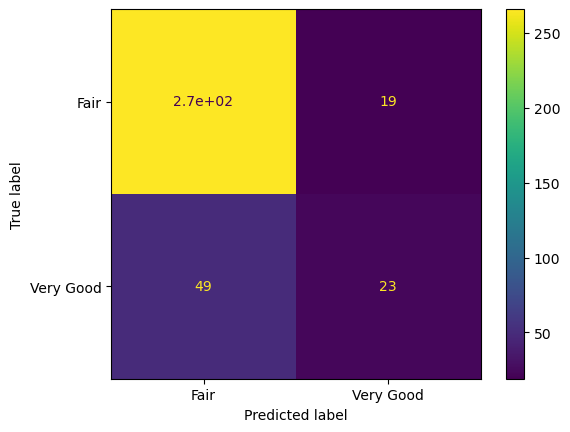

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test)  

plt.show()  

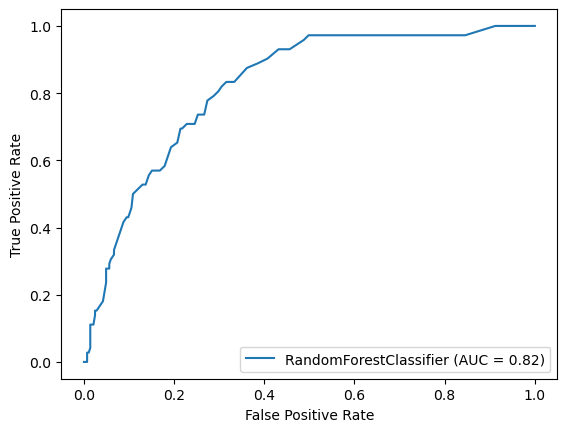

In [36]:
from sklearn.metrics import plot_roc_curve

rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.show()

In [41]:
# from sklearn import metrics
# metrics.plot_det_curve(rf, X_test, y_test)  
# plt.show()     